# About Dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Loading Libraries

In [329]:
!pip install imblearn tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [330]:
# **DATA PROCESSING**

import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

# **DATA ANALYSIS**

import matplotlib.pyplot as plt # Plots 
import seaborn as sns # Graphs

# **PRE PROCESSING**

from sklearn.preprocessing import FunctionTransformer  # Transforming of Data
from sklearn.preprocessing import OneHotEncoder # Data Encoding
from sklearn.preprocessing import StandardScaler # Data Scaling
from imblearn.over_sampling import RandomOverSampler # Data OverSampling
from sklearn.decomposition import PCA # Principal Component Analysis

# **MODELS** 

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **NERURAL NETWORKS**

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **METRICS**

from sklearn.metrics import accuracy_score # Model Classification Report



# Reading Data

In [331]:
import pandas as pd # Data Processing
import numpy as np # Array Processing
import os # Data Importing

stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [332]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploring Data

In [333]:
stroke_data.shape

(5110, 12)

In [334]:
stroke_data.ndim

2

In [335]:
stroke_data.stroke.value_counts().rename('count'),
stroke_data.stroke.value_counts(True).rename('%').mul(100)

stroke
0    95.127202
1     4.872798
Name: %, dtype: float64

In [336]:
stroke_data["stroke"].value_counts()


stroke
0    4861
1     249
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Patient')

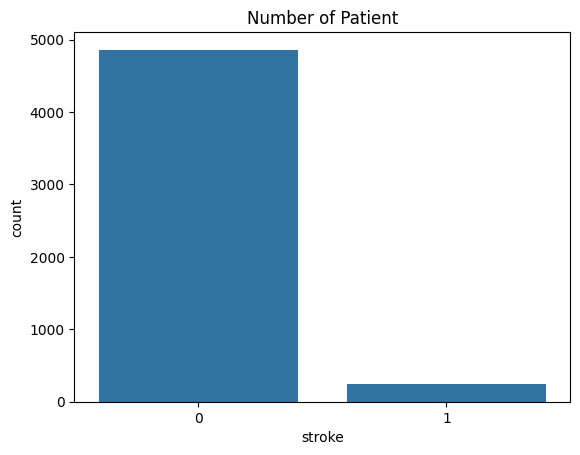

In [337]:
# Show Number of Patient by Stroke 

sns.countplot(data=stroke_data , x='stroke')
plt.title('Number of Patient')

In [338]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [339]:
stroke_data.sample(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2307,7683,Male,49.0,0,0,Yes,Self-employed,Rural,220.47,36.4,smokes,0
2837,9730,Male,27.0,0,0,Yes,Private,Urban,76.19,22.0,never smoked,0
2934,9079,Female,76.0,0,1,Yes,Self-employed,Urban,202.21,39.3,formerly smoked,0
2687,47405,Female,2.0,0,0,No,children,Rural,100.66,18.5,Unknown,0
34,14248,Male,48.0,0,0,No,Govt_job,Urban,84.20,29.7,never smoked,1
2917,11702,Female,18.0,0,0,No,Never_worked,Urban,82.36,22.7,Unknown,0
1869,7885,Female,23.0,0,0,No,Private,Rural,92.26,17.1,Unknown,0
4451,6472,Female,78.0,0,0,Yes,Govt_job,Urban,101.76,NaN,smokes,0
1328,14349,Female,40.0,0,0,Yes,Private,Urban,103.09,35.6,Unknown,0
4123,32523,Male,68.0,0,1,Yes,Private,Urban,217.74,25.5,Unknown,0


In [340]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# features name

In [341]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [342]:
stroke_data["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

# Missing Values

In [343]:
print('Missing data sum :')
print(stroke_data.isnull().sum())

print('\nMissing data percentage (%):')
print(stroke_data.isnull().sum()/stroke_data.count()*100)

Missing data sum :
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Missing data percentage (%):
id                   0.00000
gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64


# Correlation Matrix

<Axes: >

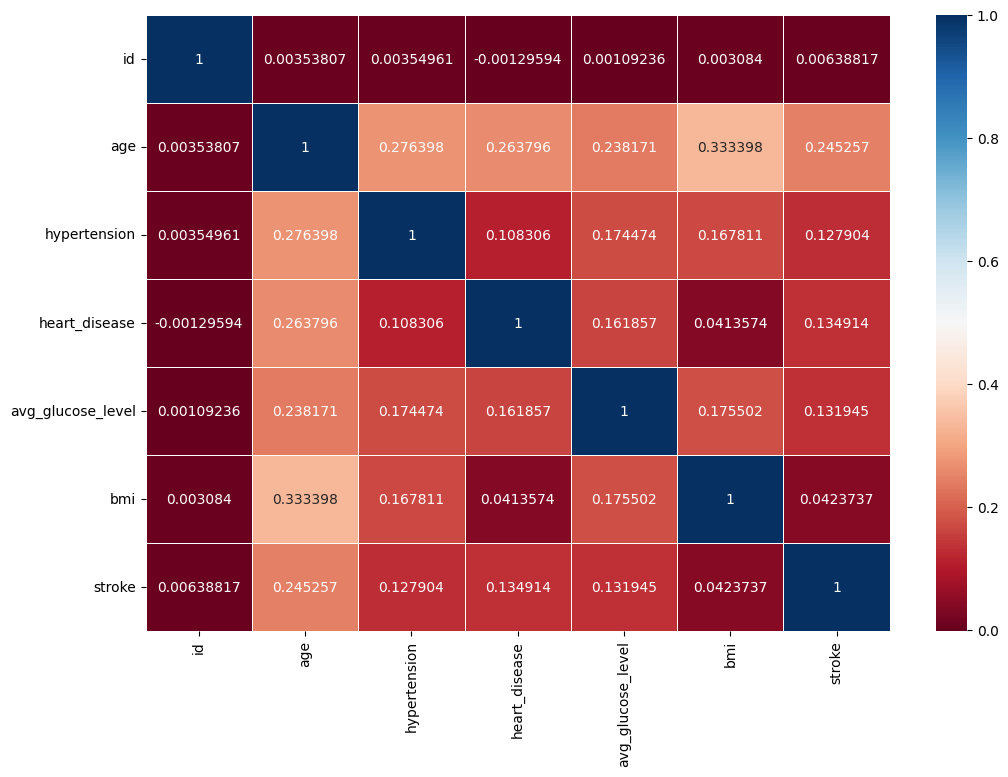

In [344]:
fig = plt.figure(figsize=(12,8))
corr = stroke_data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

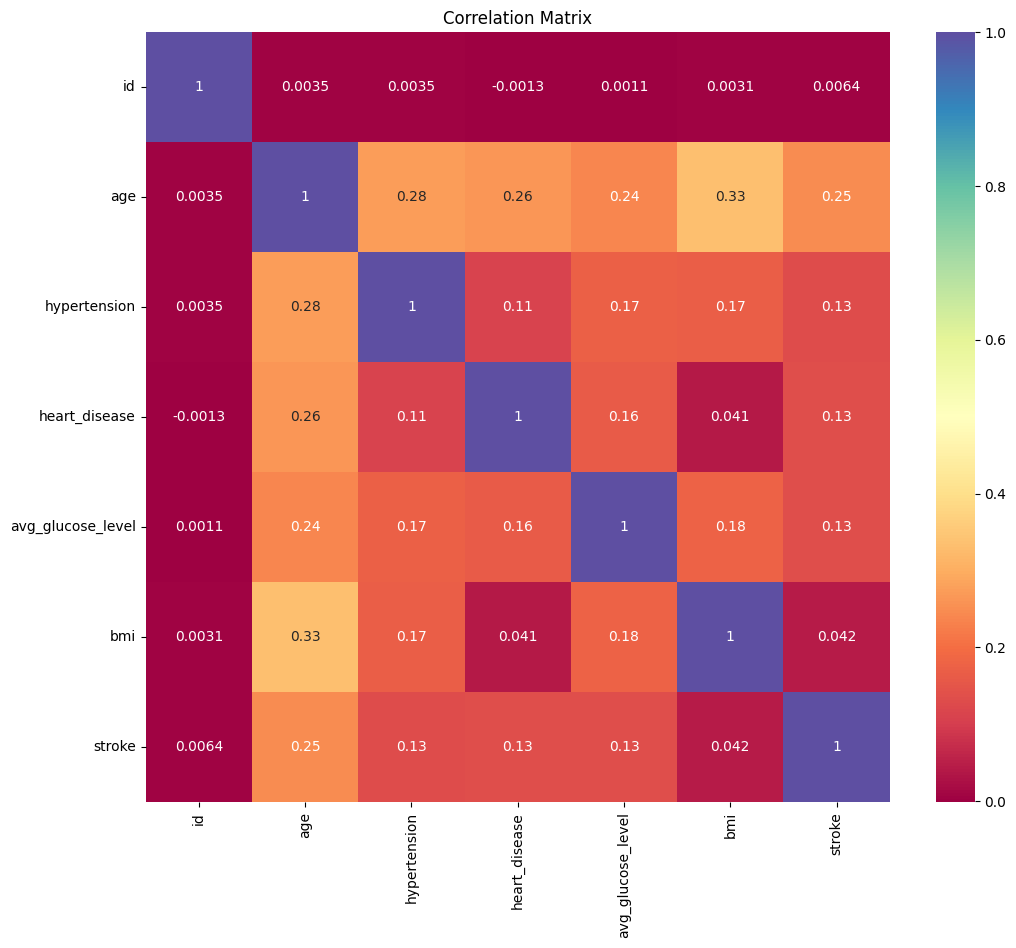

In [345]:
# Correlation matrix with only numeric columns
corr = stroke_data.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")
plt.show()

# Seperate Categorical and Numerical Features

In [346]:
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [347]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


# Checking Duplicating Values

In [348]:
stroke_data.duplicated().sum()

np.int64(0)

In [349]:
stroke_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [350]:
stroke_data['age'].nunique()

104

In [351]:
stroke_data['age'].sample(10)

354     32.0
612     48.0
2811    20.0
3873    23.0
3479    53.0
2568    69.0
2383    55.0
259     79.0
5026    38.0
1019    66.0
Name: age, dtype: float64

In [352]:
stroke_data['hypertension'].unique()

array([0, 1])

In [353]:
stroke_data['heart_disease'].unique()

array([1, 0])

In [354]:
stroke_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [355]:
stroke_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [356]:
stroke_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [357]:
stroke_data['avg_glucose_level'].nunique()

3979

In [358]:
stroke_data['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [359]:
stroke_data['bmi'].nunique()

418

In [360]:
stroke_data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [361]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [362]:
stroke_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [363]:
stroke_data['stroke'].nunique()

2

In [364]:
stroke_data['stroke'].unique()

array([1, 0])

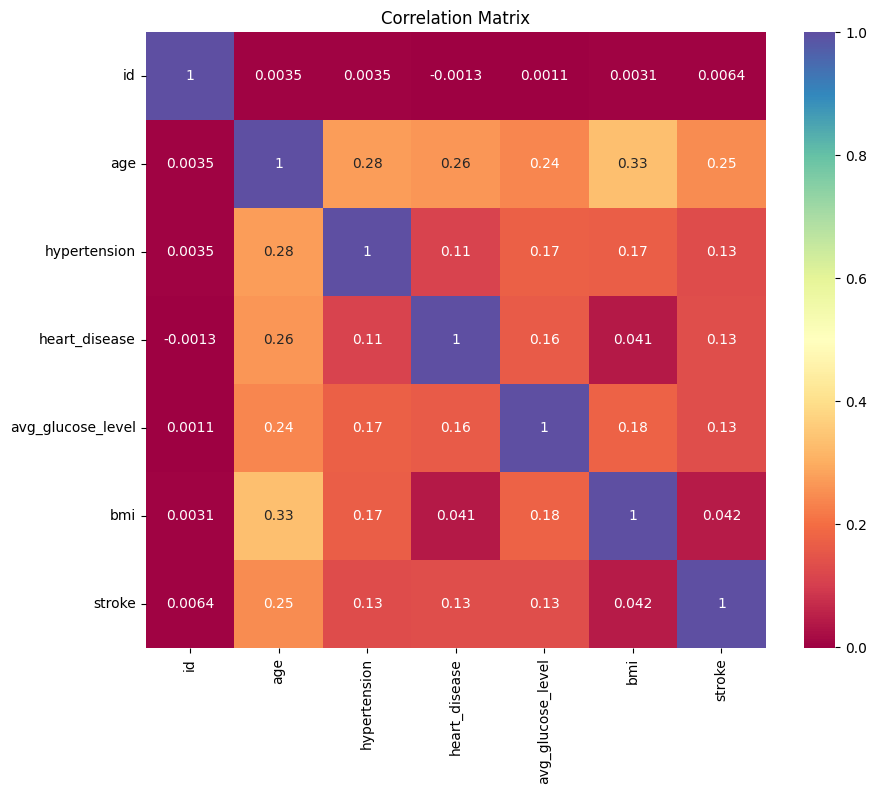

In [365]:
# Correlation matrix (only for numeric columns)
corr = stroke_data.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")
plt.show()


In [366]:
# Compute correlation only on numeric columns and round to 2 decimal places
corr_matrix = stroke_data.select_dtypes(include='number').corr().round(2)
corr_matrix

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


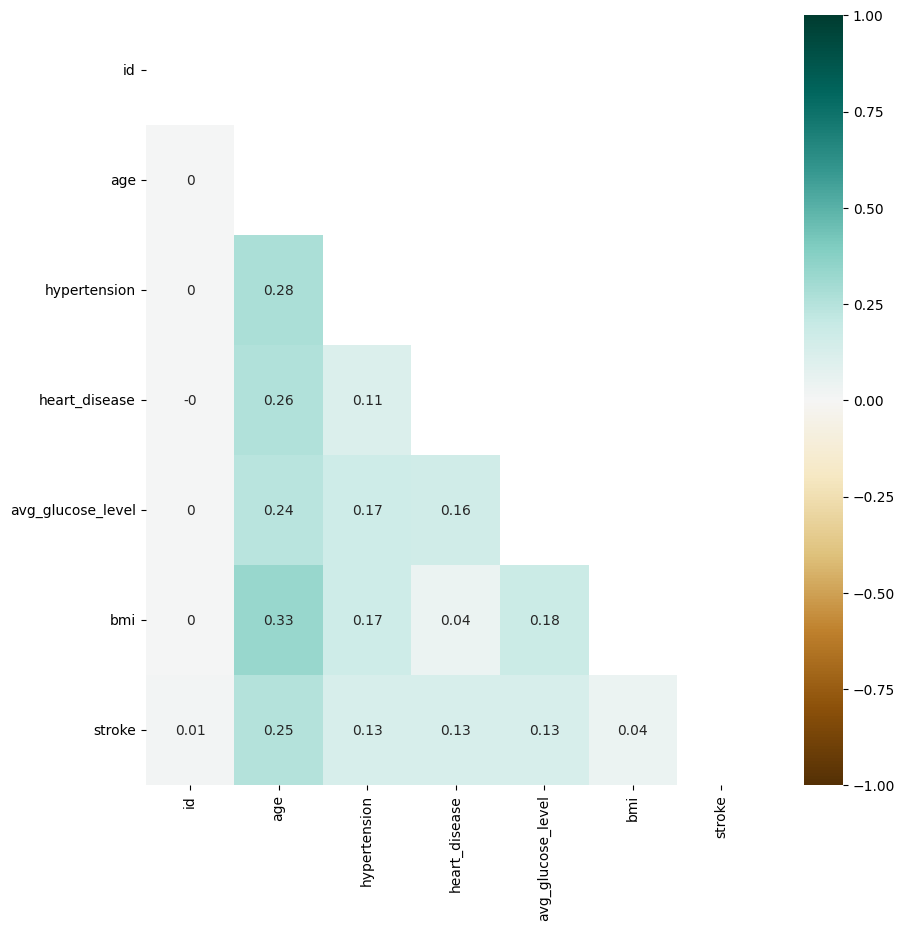

In [367]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [368]:
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [369]:
numerical_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
********************************************************************************
Numerical Variables Column:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


Visualizing Categorical Features
-

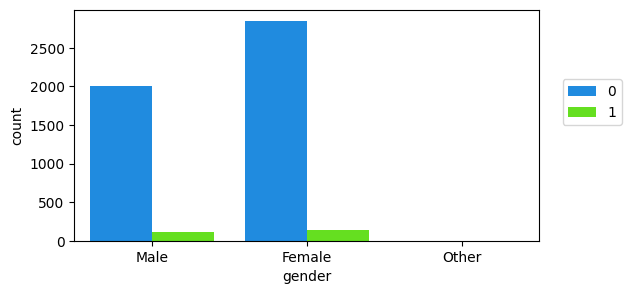

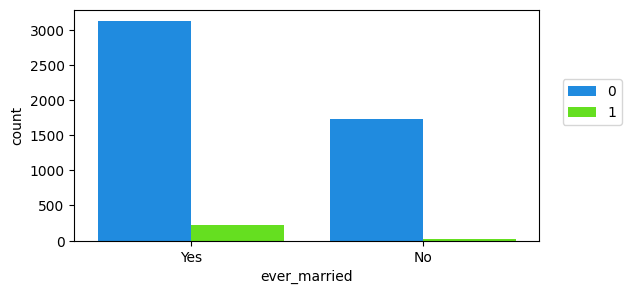

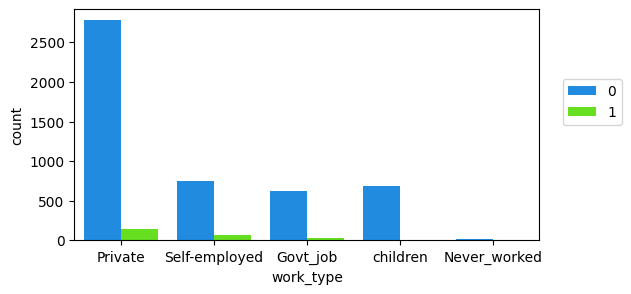

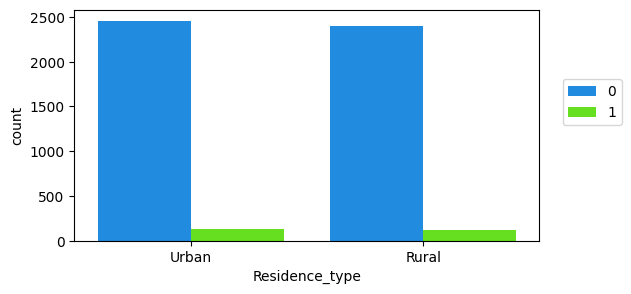

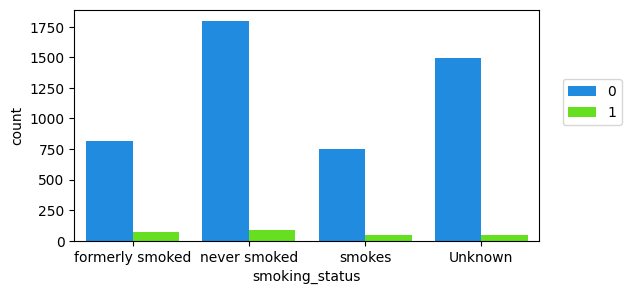

In [370]:
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=stroke_data,x=col,hue ='stroke',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

# Barplot of numerical features:

-

/tmp/ipykernel_33846/524297357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stroke_data,x='stroke',y=col,palette='gist_rainbow_r')
/tmp/ipykernel_33846/524297357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stroke_data,x='stroke',y=col,palette='gist_rainbow_r')
/tmp/ipykernel_33846/524297357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stroke_data,x='stroke',y=col,palette='gist_rainbow_r')
/tmp/ipykernel_33846/524297357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will

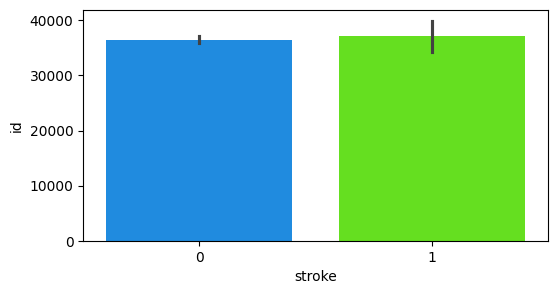

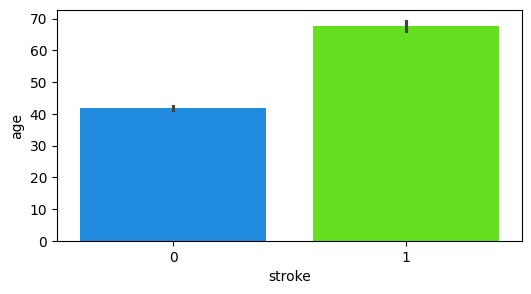

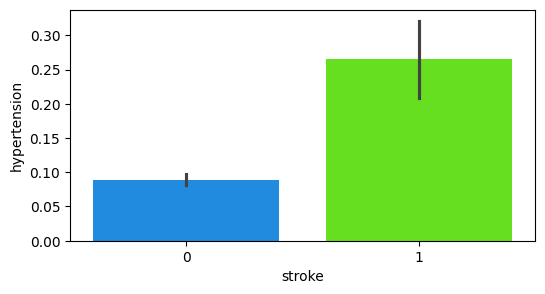

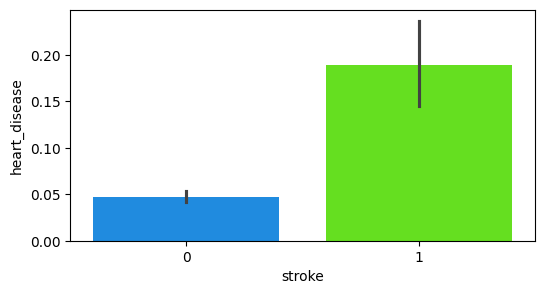

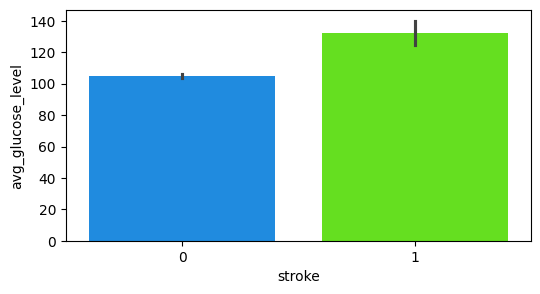

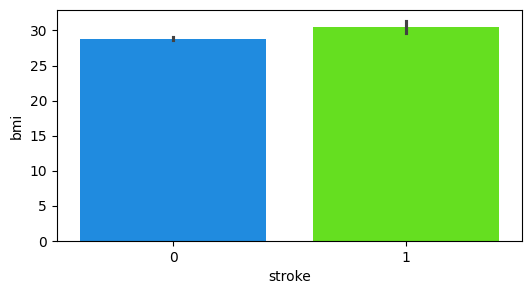

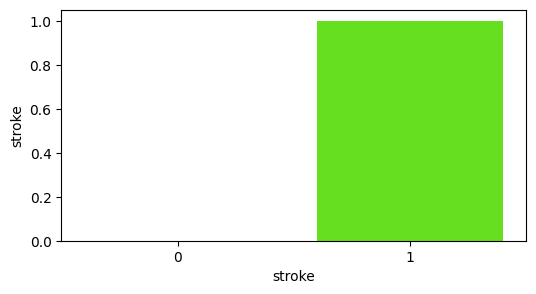

In [371]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=stroke_data,x='stroke',y=col,palette='gist_rainbow_r')

# Handling Missing Values

In [372]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [373]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [374]:
stroke_data["bmi"]=stroke_data["bmi"].fillna(stroke_data["bmi"].mean())

In [375]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# dropping irrelevant feature "id"

In [376]:
# Dropping Irrelevent Columns

train  = stroke_data.drop(['id'],axis=1)
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [377]:
train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [378]:
train.shape

(5110, 11)

In [379]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [380]:
train_data_cat = train.select_dtypes("object")
train_data_num = train.select_dtypes("number")

In [381]:
train_data_cat.head(3)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked


In [382]:
train_data_num.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1


Converting categorical features into numerical
-

In [383]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
1,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False
3,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True
4,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False


In [384]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,67.0,0,1,228.69,36.600000,1
1,True,False,False,False,True,False,False,False,True,False,...,False,False,True,False,61.0,0,0,202.21,28.893237,1
2,False,True,False,False,True,False,False,True,False,False,...,False,False,True,False,80.0,0,1,105.92,32.500000,1
3,True,False,False,False,True,False,False,True,False,False,...,False,False,False,True,49.0,0,0,171.23,34.400000,1
4,True,False,False,False,True,False,False,False,True,False,...,False,False,True,False,79.0,1,0,174.12,24.000000,1


# seperate dependant and independant feature

In [385]:
y = data['stroke']
x = data.drop('stroke', axis = 1)

In [386]:
print(x.shape)
print(y.shape)

(5110, 21)
(5110,)


# scailing the data

In [387]:
sc = StandardScaler()
x = sc.fit_transform(x)


In [388]:
x

array([[-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00,  2.70637544e+00,  1.00123401e+00],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01,  2.12155854e+00,  4.61555355e-16],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
         4.18503199e+00, -5.02830130e-03,  4.68577254e-01],
       ...,
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -5.11442636e-01,  2.21736316e-01],
       [-1.18950991e+00,  1.18998977e+00, -1.39904618e-02, ...,
        -2.38946800e-01,  1.32825706e+00, -4.27845098e-01],
       [ 8.40682358e-01, -8.40343359e-01, -1.39904618e-02, ...,
        -2.38946800e-01, -4.60867458e-01, -3.49895329e-01]])

# Splitting data into Training and Testing

In [389]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [390]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# Splitting the dataset

- training data 70%
- testing data 30%

In [391]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape

((3577, 21), (1533, 21))

# Building Classifiers

In [392]:
accuracy = {}

# Logistic Regression

In [393]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.9471624266144814


# Confusion Matrix 

<Axes: >

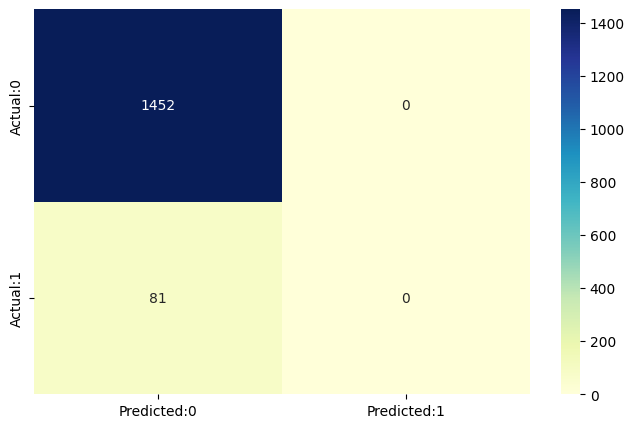

In [394]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Classification Report

In [395]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Predicting

In [396]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [397]:
test.sample(10)

,Actual,Y test predicted
1902,0,0
3213,0,0
4455,0,0
1820,0,0
207,1,0
694,0,0
3209,0,0
1769,0,0
4523,0,0
2688,0,0


# DecisionTreeClassifier

In [398]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
y_pred2 = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(dtc)] = accuracy_score(y_test, y_pred2)*100

0.9465101108936725


<Axes: >

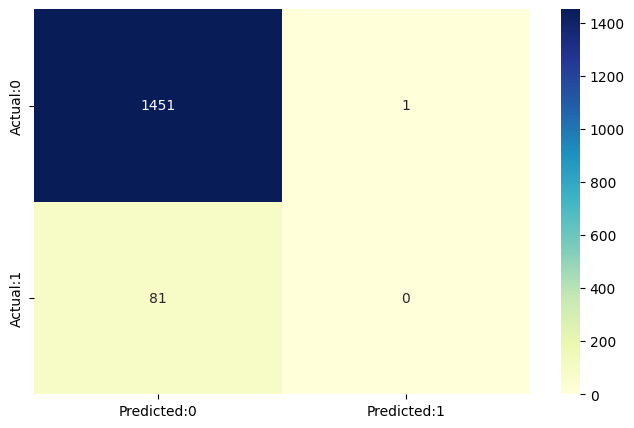

In [399]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [400]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1452
           1       0.00      0.00      0.00        81

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [401]:
y_pred_test = dtc.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [402]:
test.head(5)

,Actual,Y test predicted
2804,0,0
4866,0,0
2467,0,0
4773,0,0
3061,0,0


In [403]:
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(rfc)] = accuracy_score(y_test, y_pred3)*100

0.9471624266144814


<Axes: >

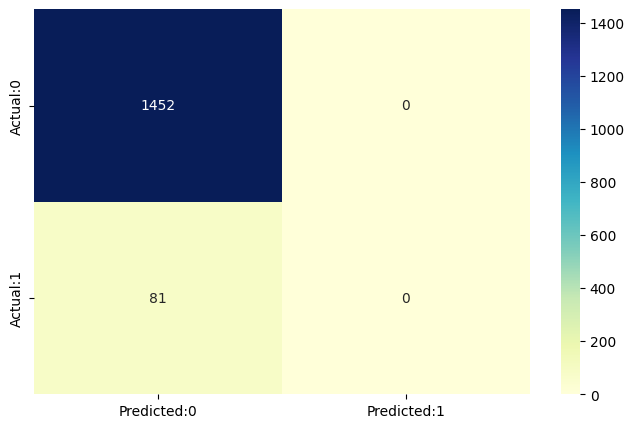

In [404]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred3)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [405]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(gbc)] = accuracy_score(y_test, y_pred4)*100

0.9432485322896281


<Axes: >

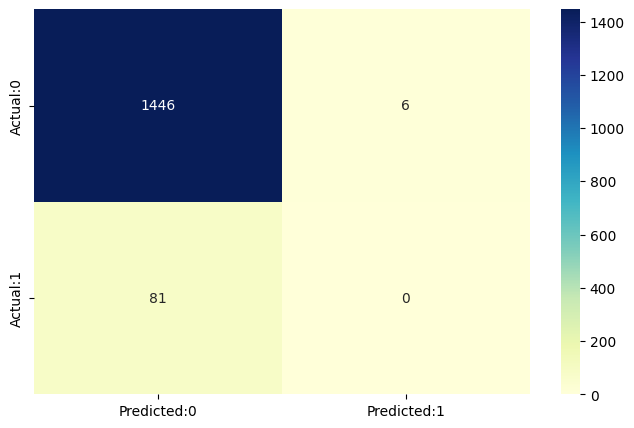

In [406]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred4)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# SVM 

In [407]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred5 = svc.predict(X_test)
print(accuracy_score(y_test, y_pred5))
accuracy[str(svc)] = accuracy_score(y_test, y_pred5)*100

0.9471624266144814


<Axes: >

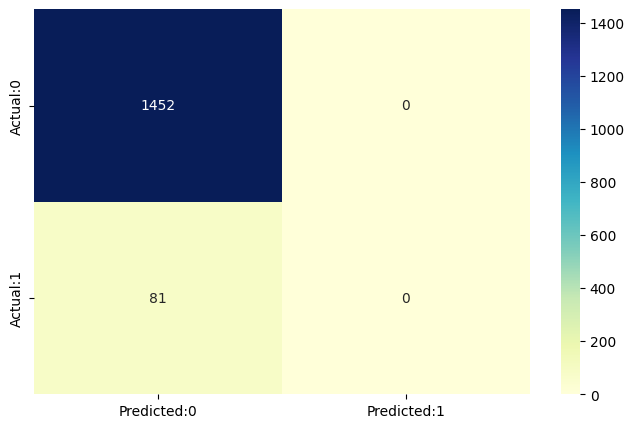

In [408]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred5)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [409]:
accuracy

{'LogisticRegression(max_iter=200)': 94.71624266144813,
 'DecisionTreeClassifier(max_depth=3)': 94.65101108936726,
 'RandomForestClassifier(max_depth=5)': 94.71624266144813,
 'GradientBoostingClassifier()': 94.32485322896281,
 'SVC()': 94.71624266144813}

# Conclusion

- Almost all heart disease people are above 50, which is obvious.
- Hypertesion disease in people of above 50.
- The most important features are "age", "bmi" and "glucose_level".
- Only 249 of the total dataset is positive for stroke(4.8%)
- This happens when we have very less(<5%) diagnosed positive for stroke i.e unbalanced target variable.
- We can use SMOTE(Synthetic Minority Oversampling Technique) to increase(oversample) the target varaible. It works by duplicating examples in the minority class.

# Handling this data using SMOTE

In [410]:
from imblearn.over_sampling import SMOTE

In [411]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x1, y1 = smote.fit_resample(x, y)

print(y1.value_counts())

stroke
1    4861
0    4861
Name: count, dtype: int64


# Splitting the oversampling data

In [412]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, shuffle=True, random_state=3)


In [413]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6805, 21)
(2917, 21)
(6805,)
(2917,)


In [414]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(lr)] = accuracy_score(y_test, y_pred1)*100

0.7963661295851903


<Axes: >

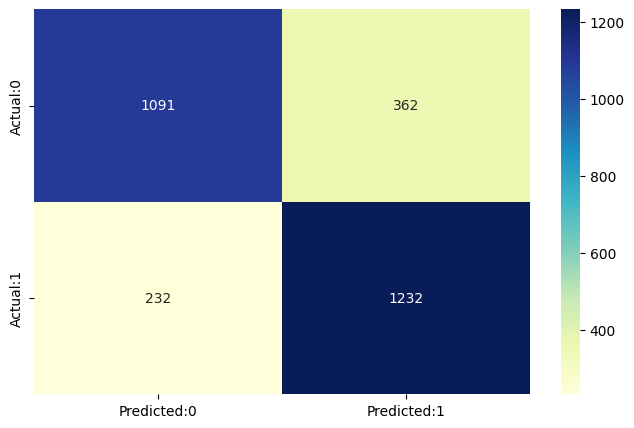

In [415]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred1)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [416]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1453
           1       0.77      0.84      0.81      1464

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917



In [417]:
y_pred_test = lr.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [418]:
test.head()

,Actual,Y test predicted
6893,1,1
940,0,0
5285,1,0
1839,0,1
9293,1,1


In [419]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
knn_predict = knn_model.predict(X_test)
print(accuracy_score(y_test, knn_predict))
accuracy[str(lr)] = accuracy_score(y_test, knn_predict)*100

0.9033253342475146


<Axes: >

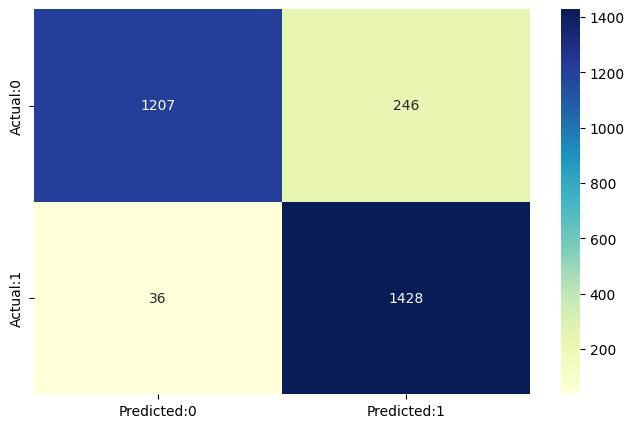

In [420]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,knn_predict)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [421]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1453
           1       0.85      0.98      0.91      1464

    accuracy                           0.90      2917
   macro avg       0.91      0.90      0.90      2917
weighted avg       0.91      0.90      0.90      2917



In [422]:
y_pred_test = knn_model.predict(X_test)

test = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

In [423]:
test.sample(10)

,Actual,Y test predicted
590,0,0
2157,0,0
2811,0,0
6065,1,1
8431,1,1
9647,1,1
1328,0,0
8790,1,1
3165,0,1
328,0,0


# Deep Learning 

In [424]:
import tensorflow as tf
from tensorflow import keras

#es=tf.keras.callbacks.EarlyStopping(
#    min_delta=0.001,
#    patience=10,
#    restore_best_weights=True)

# Create Neural Network

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [425]:
model=keras.Sequential([
    keras.layers.Dense(4800,input_shape=[21], activation='relu'),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'), 
    keras.layers.Dense(1,activation="sigmoid")
])
model.summary()

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-20 07:42:24.577127: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-05-20 07:42:24.788189: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38400000 exceeds 10% of free system memory.
2025-05-20 07:42:24.843310: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38400000 exceeds 10% of free system memory.
2025-05-20 07:42:24.859248: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38400000 exceeds 10% of free system memory.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4800)           │       105,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │     9,602,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     2,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,710,601 (48.49 MB)

 Trainable params: 12,710,601 (48.49 MB)

 Non-trainable params: 0 (0.00 B)

- compile method takes three arguments
- loss >> binary crossentropy
- optimizer >> adam
- matrix >> accuracy

In [426]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

- Fit method is used for fitting the data into model / neural network
- epochs = 100
- batch size = 100

In [ ]:
train = model.fit(X_train, y_train, epochs=100,batch_size=100)

Epoch 1/100


2025-05-20 07:42:26.399160: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38400000 exceeds 10% of free system memory.


 1/69 ━━━━━━━━━━━━━━━━━━━━ 2:17 2s/step - accuracy: 0.6000 - loss: 0.6883

2025-05-20 07:42:27.397461: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38400000 exceeds 10% of free system memory.


69/69 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.7432 - loss: 0.5241
Epoch 2/100
15/69 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.8253 - loss: 0.4043

69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - accuracy: 0.8286 - loss: 0.3952
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.8405 - loss: 0.3492
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 175ms/step - accuracy: 0.8745 - loss: 0.2932
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.8837 - loss: 0.2747
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.8961 - loss: 0.2477
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.9170 - loss: 0.2181
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 178ms/step - accuracy: 0.9138 - loss: 0.2091
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 189ms/step - accuracy: 0.9169 - loss: 0.2079
Epoch 10/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9215 - loss: 0.1889
Epoch 11/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - accuracy: 0.9239 - loss: 0.1806
Epoch 12/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - accuracy: 0.9296 - loss: 0.1829
Epoch 13/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
model.evaluate(X_test, y_test)

92/92 [==============================] - 4s 42ms/step - loss: 0.3022 - accuracy: 0.9482


[0.3022470474243164, 0.948234498500824]

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

92/92 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1453
           1       0.89      0.98      0.93      1464

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



<AxesSubplot:>

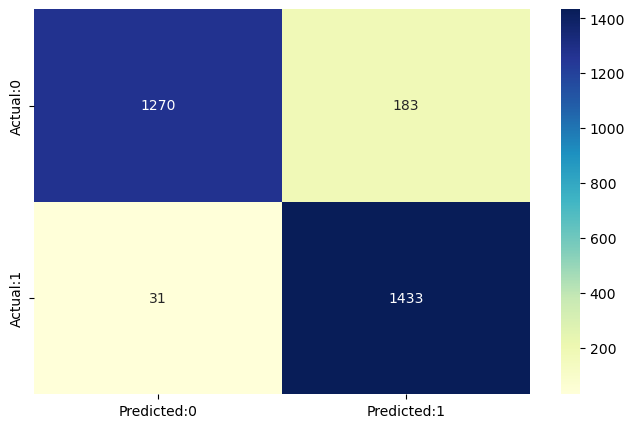

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

- Creating sequnetial ANN Network
- Creating 5 layers Network
- Activation is "Relu"
- Adding Dropout layer
- Last layer is output layer
- Problem is binary classification thats way output node is 1 and activation is "sigmoid"

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(21,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               11264     
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 256)               131328    
                                                                 
 dense_25 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 128)              

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.0001), metrics=['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(
    monitor='accuracy',
    min_delta=0.001,
    patience=100,
    mode='auto')

In [ ]:
model.fit(X_train, y_train,epochs=50, batch_size=100, validation_split=0.30,callbacks=cb)


Epoch 1/50
48/48 [==============================] - 5s 40ms/step - loss: 0.5488 - accuracy: 0.7178 - val_loss: 0.4154 - val_accuracy: 0.8276
Epoch 2/50
48/48 [==============================] - 1s 28ms/step - loss: 0.4457 - accuracy: 0.7940 - val_loss: 0.3862 - val_accuracy: 0.8335
Epoch 3/50
48/48 [==============================] - 1s 26ms/step - loss: 0.4041 - accuracy: 0.8152 - val_loss: 0.3612 - val_accuracy: 0.8408
Epoch 4/50
48/48 [==============================] - 1s 27ms/step - loss: 0.3805 - accuracy: 0.8289 - val_loss: 0.3437 - val_accuracy: 0.8531
Epoch 5/50
48/48 [==============================] - 1s 27ms/step - loss: 0.3596 - accuracy: 0.8421 - val_loss: 0.3180 - val_accuracy: 0.8697
Epoch 6/50
48/48 [==============================] - 1s 26ms/step - loss: 0.3347 - accuracy: 0.8528 - val_loss: 0.3167 - val_accuracy: 0.8683
Epoch 7/50
48/48 [==============================] - 1s 26ms/step - loss: 0.3282 - accuracy: 0.8564 - val_loss: 0.2958 - val_accuracy: 0.8786
Epoch 8/50
48

# Testing the model

In [ ]:
model.evaluate(X_test, y_test)

92/92 [==============================] - 1s 6ms/step - loss: 0.2572 - accuracy: 0.9266


[0.25721579790115356, 0.9266369342803955]

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=np.round(y_pred)

y_pred[:11]
y_test[:11]

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

92/92 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1453
           1       0.89      0.98      0.93      1464

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



# Confusion Matrix

<AxesSubplot:>

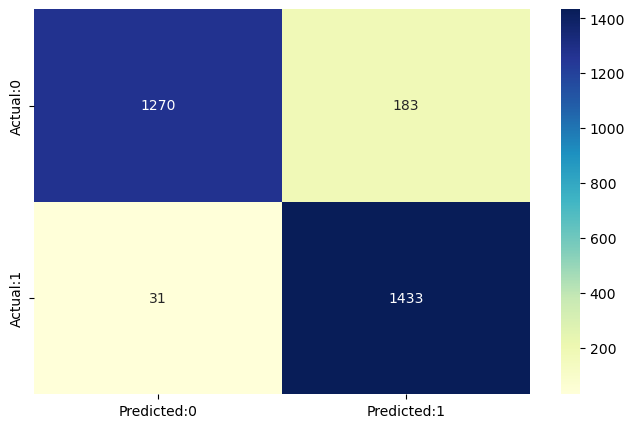

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

The End: